<a href="https://colab.research.google.com/github/Shahanas2003/digit_recognizer/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from tensorflow.keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten images: 28x28 → 784
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Optional: Reduce training size to speed up training (RF can be slow on full MNIST)
x_train_small = x_train[:10000]
y_train_small = y_train[:10000]


In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_small, y_train_small)


RandomForestClassifier(random_state=42)

Accuracy: 0.9504
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.94      0.94      0.94      1010
           4       0.96      0.95      0.95       982
           5       0.96      0.93      0.94       892
           6       0.95      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.95      0.92      0.93       974
           9       0.92      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



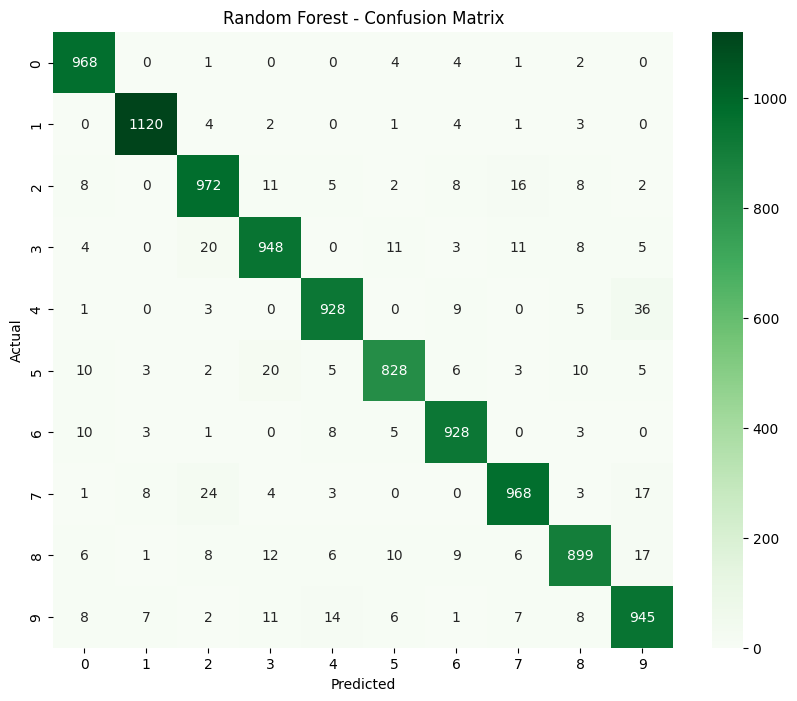

In [9]:
y_pred = rf_model.predict(x_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


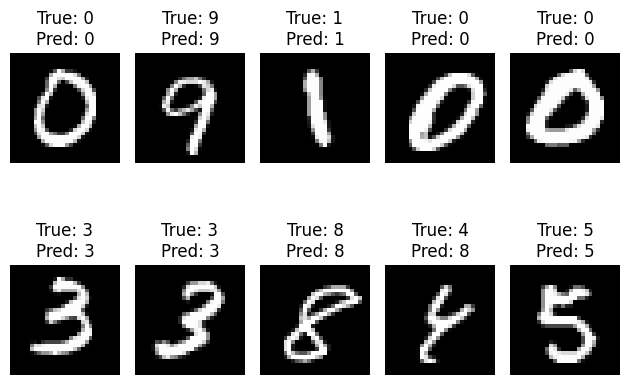

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a few test samples to visualize
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)

for i, idx in enumerate(indices):
    image = x_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    pred_label = y_pred[idx]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [12]:
import joblib

# Save model
joblib.dump(rf_model, 'random_forest_mnist.pkl')

# Later, you can load it like this:
# loaded_model = joblib.load('random_forest_mnist.pkl')


['random_forest_mnist.pkl']

In [13]:
pip install streamlit scikit-learn pillow joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [16]:
# 🛠 Create the app.py file inside Colab

%%writefile app.py
import streamlit as st
import joblib
import numpy as np
from PIL import Image, ImageOps

# Load the trained Random Forest model
model = joblib.load("random_forest_mnist.pkl")

st.set_page_config(page_title="Digit Classifier", page_icon="✍️")
st.title("🧠 Handwritten Digit Classifier")

st.markdown("""
Upload an image of a **handwritten digit** (0-9).
Make sure it's **centered and white on black background** like MNIST format.
""")

# File uploader
uploaded_file = st.file_uploader("Choose a digit image", type=["png", "jpg", "jpeg"])

if uploaded_file:
    image = Image.open(uploaded_file).convert('L')  # Convert to grayscale

    # Resize and invert (MNIST-style)
    image = ImageOps.invert(image)
    image = image.resize((28, 28))
    st.image(image, caption='Processed Image', width=150)

    # Preprocess for model
    img_array = np.array(image).astype('float32') / 255.0
    img_flattened = img_array.reshape(1, -1)

    # Predict
    prediction = model.predict(img_flattened)[0]
    st.success(f"✅ Predicted Digit: **{prediction}**")


Overwriting app.py
